In [91]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce


In [92]:
import torchhd
import numpy as np
from torchhd import bundle, bind, cosine_similarity
from torch import roll

In [93]:
N = 10000

In [94]:
x, y, z = torchhd.random(3, N)

In [95]:
def hdv():
    return torchhd.random(1, N)

def hdv_m(rows: int):
    return torchhd.random(rows, N)

def bind_m(*xs):
    return reduce(bind, xs)

In [96]:
np.array_equal(bind(bind(x, y), x), y)


True

In [97]:
np.array_equal(bind(x, bundle(y, z)),
               bundle(bind(x, y), bind(x, z)))

True

In [98]:
np.array_equal(
    cosine_similarity(x, y),
    cosine_similarity(bind(x, z), bind(y, z)))

True

Similarly, permutation or shifting (roll) also perserves the similarity between two vectors.

In [99]:
np.array_equal(
    cosine_similarity(x, y),
    cosine_similarity(roll(x, 1), roll(y, 1)))

True

### Example 1: colour matching

In [100]:
import seaborn

n_colors = 50
reds = seaborn.color_palette("Reds", n_colors=n_colors)
blues = seaborn.color_palette("Blues", n_colors=n_colors)
greens = seaborn.color_palette("Greens", n_colors=n_colors)
oranges = seaborn.color_palette("Oranges", n_colors=n_colors)
greys = seaborn.color_palette("Greys", n_colors=n_colors)
yellows = seaborn.light_palette("Yellow", n_colors=n_colors)
whites = seaborn.light_palette("White", n_colors=n_colors)

emojis_colors = {
    '🚒': reds,
    '💦': blues,
    '🌱': greens,
    '🌅': oranges,
    '🐺': greys,
    '🍌': yellows,
    '🥚': whites
}

emojis = list(emojis_colors.keys())

toy_data1 = [(emoji := random.choice(emojis), random.choice(emojis_colors[emoji]))
             for _ in range(100)]

reds

[(0.9993848519800077, 0.9478662053056517, 0.922722029988466),
 (0.9987697039600154, 0.9349480968858132, 0.9042675893886967),
 (0.9981545559400231, 0.9220299884659746, 0.8858131487889274),
 (0.9975394079200308, 0.9091118800461361, 0.867358708189158),
 (0.9969242599000384, 0.8961937716262975, 0.8489042675893886),
 (0.9963091118800461, 0.883275663206459, 0.8304498269896193),
 (0.9953094963475586, 0.8642060745866974, 0.8046905036524413),
 (0.994079200307574, 0.8414455978469819, 0.7745482506728181),
 (0.9928489042675894, 0.8186851211072664, 0.7444059976931949),
 (0.9916186082276048, 0.795924644367551, 0.7142637447135717),
 (0.9903883121876201, 0.7731641676278354, 0.6841214917339484),
 (0.9891580161476355, 0.75040369088812, 0.6539792387543253),
 (0.9882352941176471, 0.7270280661284121, 0.6241445597846982),
 (0.9882352941176471, 0.7018069973087273, 0.5952326028450596),
 (0.9882352941176471, 0.6765859284890426, 0.566320645905421),
 (0.9882352941176471, 0.6513648596693579, 0.5374086889657824),
 (0.9882352941176471, 0.6261437908496732, 0.5084967320261438),
 (0.9882352941176471, 0.6009227220299885, 0.4795847750865053),
 (0.9882352941176471, 0.5757016532103036, 0.4506728181468666),
 (0.9876970396001539, 0.5510188389081122, 0.4255286428296809),
 (0.9870818915801615, 0.5264129181084198, 0.40092272202998847),
 (0.9864667435601692, 0.5018069973087274, 0.3763168012302961),
 (0.9858515955401769, 0.477201076509035, 0.3517108804306036),
 (0.9852364475201845, 0.4525951557093426, 0.32710495963091124),
 (0.9846212995001922, 0.42798923490965013, 0.30249903883121876),
 (0.9806228373702421, 0.40123029603998467, 0.2809688581314879),
 (0.9732410611303345, 0.37231833910034606, 0.2625144175317186),
 (0.9658592848904267, 0.34340638216070746, 0.24405997693194925),
 (0.9584775086505191, 0.31449442522106885, 0.22560553633217995),
 (0.9510957324106113, 0.2855824682814302, 0.2071510957324106),
 (0.9437139561707035, 0.25667051134179164, 0.18869665513264128),
 (0.9344867358708189, 0.2286812764321415, 0.17139561707035755),
 (0.9123414071510957, 0.2071510957324106, 0.1621683967704729),
 (0.8901960784313725, 0.18562091503267975, 0.15294117647058825),
 (0.8680507497116493, 0.16409073433294888, 0.14371395617070357),
 (0.8459054209919262, 0.14256055363321812, 0.13448673587081897),
 (0.8237600922722029, 0.12103037293348712, 0.12525951557093426),
 (0.8016147635524797, 0.09950019223375625, 0.1160322952710496),
 (0.7785467128027681, 0.08996539792387544, 0.11003460207612456),
 (0.7551710880430603, 0.08442906574394464, 0.10511341791618607),
 (0.7317954632833525, 0.07889273356401384, 0.10019223375624758),
 (0.7084198385236448, 0.07335640138408304, 0.09527104959630911),
 (0.685044213763937, 0.06782006920415225, 0.09034986543637061),
 (0.6616685890042292, 0.06228373702422145, 0.08542868127643213),
 (0.6327566320645905, 0.05536332179930796, 0.08050749711649365),
 (0.5946174548250673, 0.04613610149942329, 0.07558631295655516),
 (0.556478277585544, 0.03690888119953864, 0.07066512879661667),
 (0.5183391003460208, 0.02768166089965398, 0.06574394463667818),
 (0.4801999231064975, 0.01845444059976932, 0.06082276047673971),
 (0.44206074586697425, 0.00922722029988466, 0.05590157631680122)]

In [101]:
emojis_hdvs = {emoji: hdv() for emoji in emojis}

In [102]:
def randcol():
    return np.random.rand(3)

def show_color(color):
    plt.figure(figsize=(1,1))
    plt.imshow([[color]])
    plt.axis('off')
    plt.show()

acolor = randcol()
acolor

array([0.29834228, 0.01419963, 0.12630413])

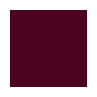

In [103]:
show_color(acolor)

In [104]:
def range_hdvs(steps):
    k = len(steps) - 1

    V = hdv_m(k + 1)  # V size is (k+1)xN

    for i in range(1, k + 1):  # for each other row/step
        for j in range(N):     # for each column
            V[i, j] = -V[i-1, j] if random.random() < (1 / k) else V[i-1, j]

    return V


In [105]:
color_steps = np.arange(0, 1.05, 0.05)

In [106]:
reds_hdv = range_hdvs(color_steps)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
V0,0.113000,0.122400,0.139800,0.152000,0.170600,0.191800,0.216000,0.236600,0.273600,0.310800,...,0.393400,0.447600,0.492799,0.539599,0.597199,0.665599,0.733199,0.816199,0.903199,0.999999
V1,0.125000,0.135600,0.155400,0.174400,0.192200,0.215000,0.240000,0.266200,0.303200,0.341600,...,0.433399,0.491599,0.541999,0.591999,0.655999,0.731599,0.807199,0.899799,0.999999,0.903199
V2,0.145600,0.158600,0.181600,0.203800,0.226000,0.250000,0.278200,0.302000,0.337800,0.382200,...,0.477599,0.541399,0.596599,0.658199,0.730599,0.814199,0.900199,0.999999,0.899799,0.816199
V3,0.161800,0.181200,0.204600,0.227600,0.251400,0.280600,0.314400,0.341400,0.381200,0.426799,...,0.529399,0.597199,0.660799,0.729999,0.811999,0.904399,0.999999,0.900199,0.807199,0.733199
V4,0.173400,0.194400,0.217000,0.242000,0.271000,0.304200,0.338400,0.371400,0.414800,0.471199,...,0.585799,0.654399,0.725999,0.801999,0.895999,0.999999,0.904399,0.814199,0.731599,0.665599
V5,0.195000,0.221600,0.246600,0.275200,0.310200,0.346200,0.383200,0.418600,0.467199,0.529199,...,0.656999,0.731599,0.811999,0.899199,0.999999,0.895999,0.811999,0.730599,0.655999,0.597199
V6,0.214200,0.241200,0.273000,0.310000,0.345400,0.382600,0.420800,0.462599,0.515999,0.581999,...,0.725799,0.808799,0.901199,0.999999,0.899199,0.801999,0.729999,0.658199,0.591999,0.539599
V7,0.238200,0.267200,0.302600,0.343200,0.384200,0.425399,0.469599,0.515399,0.572799,0.647199,...,0.801799,0.894799,0.999999,0.901199,0.811999,0.725999,0.660799,0.596599,0.541999,0.492799
V8,0.262200,0.293600,0.334600,0.377600,0.423399,0.468999,0.520399,0.574999,0.642799,0.723199,...,0.892999,0.999999,0.894799,0.808799,0.731599,0.654399,0.597199,0.541399,0.491599,0.447600
V9,0.299200,0.333400,0.379600,0.424600,0.475600,0.524399,0.586199,0.646799,0.720999,0.806999,...,0.999999,0.892999,0.801799,0.725799,0.656999,0.585799,0.529399,0.477599,0.433399,0.393400


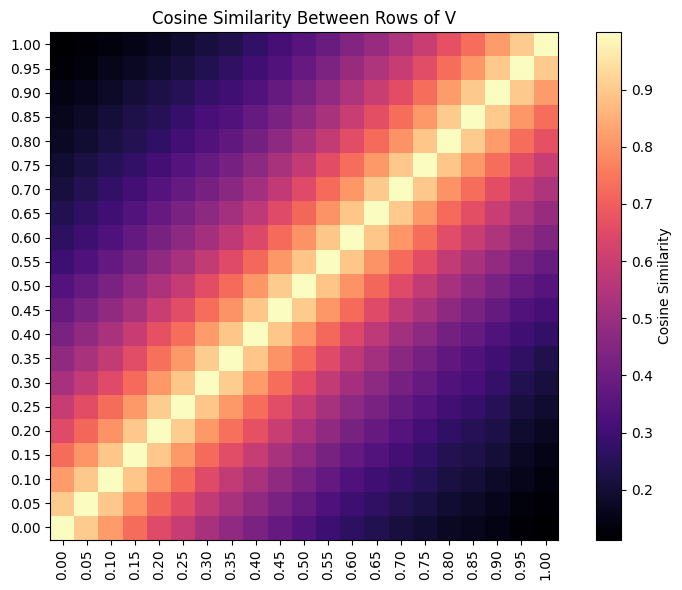

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similaridad coseno
cos_sim_matrix = cosine_similarity(reds_hdv)
cos_sim_matrix = cos_sim_matrix[::-1, :]

# Representar la matriz de similaridad como DataFrame para mejor visualización
df_cos_sim = pd.DataFrame(cos_sim_matrix,
                          index=[f"V{i}" for i in range(reds_hdv.shape[0])],
                          columns=[f"V{i}" for i in range(reds_hdv.shape[0])])

# Mostrar en formato tabla
display(df_cos_sim)

# Representar la matriz de similaridad coseno con un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(cos_sim_matrix, cmap='magma', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title("Cosine Similarity Between Rows of V")
plt.xticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps], rotation=90)
plt.yticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps[::-1]])

plt.tight_layout()
plt.show()


In [108]:
greens_hdv = range_hdvs(color_steps)
blues_hdv = range_hdvs(color_steps)

In [109]:
def col_ind(component):
    return round(component * 20)

def encode_col(color):
    return bind_m(
        reds_hdv[col_ind(color[0])],
        greens_hdv[col_ind(color[1])],
        blues_hdv[col_ind(color[2])])

In [110]:
colhdv = encode_col(acolor)

In [111]:
ref_colors = [{'color':c, 'hdv':encode_col(c)} for c in [randcol() for _ in range(1000)]]

In [112]:
def decode_colors(v):
    best_match = max(ref_colors, key=lambda item: cosine_similarity(v, item["hdv"]))
    show_color(best_match["color"])
    return best_match["color"]

In [113]:
decode_colors(colhdv)  # we more or less recover the color!

ValueError: Expected 2D array, got 1D array instead:
array=[-1.  1. -1. ...  1. -1.  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.